# Weather Prediction Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Step 1: Data Importing and Exploration

In [2]:
data=pd.read_csv(r"seattle-weather.csv", encoding="utf-8")
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
data.shape

(1461, 6)

# Step 2: Data Preprocessing

In [5]:
data["date"]=pd.to_datetime(data["date"], format="%Y-%m-%d")

In [6]:
data["month"]=data["date"].dt.month
data["year"]=data["date"].dt.year
data["day"]=data["date"].dt.day

In [7]:
unique_values=data["precipitation"].unique()
counts_values=data["precipitation"].value_counts()

for value in unique_values:
    count= counts_values.get(value, 0)
    print(f"Values:{value},Count:{count}")

Values:0.0,Count:838
Values:10.9,Count:6
Values:0.8,Count:23
Values:20.3,Count:2
Values:1.3,Count:21
Values:2.5,Count:12
Values:4.3,Count:11
Values:1.0,Count:26
Values:4.1,Count:19
Values:5.3,Count:8
Values:8.1,Count:10
Values:19.8,Count:1
Values:15.2,Count:5
Values:13.5,Count:5
Values:3.0,Count:18
Values:6.1,Count:9
Values:8.6,Count:6
Values:4.8,Count:6
Values:27.7,Count:3
Values:3.6,Count:15
Values:1.8,Count:18
Values:0.3,Count:54
Values:2.8,Count:6
Values:11.4,Count:2
Values:17.3,Count:2
Values:6.4,Count:4
Values:2.0,Count:20
Values:6.9,Count:7
Values:0.5,Count:40
Values:10.4,Count:1
Values:13.7,Count:6
Values:19.3,Count:4
Values:9.4,Count:9
Values:23.9,Count:1
Values:8.4,Count:4
Values:27.4,Count:3
Values:5.6,Count:9
Values:13.2,Count:2
Values:1.5,Count:25
Values:4.6,Count:11
Values:2.3,Count:13
Values:6.6,Count:5
Values:10.7,Count:3
Values:3.8,Count:8
Values:18.5,Count:5
Values:14.0,Count:3
Values:16.0,Count:3
Values:16.5,Count:3
Values:15.7,Count:2
Values:5.8,Count:8
Values:7.9,C

In [8]:
data["year"].unique()

array([2012, 2013, 2014, 2015], dtype=int64)

In [9]:
data["weather"].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [10]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
month            0
year             0
day              0
dtype: int64

In [11]:
data["temp_max"].unique()

array([12.8, 10.6, 11.7, 12.2,  8.9,  4.4,  7.2, 10. ,  9.4,  6.1,  5. ,
        1.1,  1.7,  3.3,  0. , -1.1,  8.3,  6.7, 14.4, 15.6, 13.9, 16.1,
       11.1,  7.8,  5.6, 15. , 13.3, 16.7, 21.1, 20. , 17.8, 23.3, 21.7,
       23.9, 18.3, 24.4, 25.6, 26.7, 19.4, 17.2, 22.2, 18.9, 22.8, 20.6,
       25. , 28.3, 27.8, 26.1, 27.2, 33.9, 30.6, 28.9, 31.1, 34.4, 32.8,
       32.2,  3.9,  2.8,  2.2, 30. , 31.7, -0.5, -1.6, 29.4, 35.6, 33.3,
       35. ])

In [12]:
data["temp_min"].unique()

array([ 5. ,  2.8,  7.2,  5.6,  2.2,  0.6, -1.1, -1.7, -2.8, -3.3,  0. ,
        3.3,  1.1,  4.4, -2.2,  3.9,  6.1,  1.7,  7.8,  6.7, -0.6,  8.9,
        8.3, 10. ,  9.4, 12.8, 11.7, 11.1, 12.2, 10.6, 15. , 13.3, 14.4,
       13.9, 16.7, 17.8, 15.6, 18.3, 16.1, -3.9, -4.4, 17.2, -0.5, -2.1,
       -4.9, -4.3, -7.1, -6.6, -1.6, -5.5, -6. , -3.2, -2.7, -1. , -3.8])

In [13]:
data["wind"].unique()

array([4.7, 4.5, 2.3, 6.1, 2.2, 2. , 3.4, 5.1, 1.9, 1.3, 5.3, 3.2, 5. ,
       5.6, 1.6, 8.2, 4.8, 3.6, 5.4, 1.4, 3.9, 2.7, 2.6, 4.3, 2.9, 2.4,
       3. , 3.1, 1.8, 2.1, 8.1, 7.5, 5.9, 3.5, 6.4, 4.2, 7. , 6.2, 2.5,
       2.8, 5.8, 3.8, 5.2, 4.4, 6.8, 4.1, 4. , 8. , 4.6, 1.5, 6.3, 3.3,
       3.7, 1.7, 6. , 1.1, 7.3, 6.5, 5.7, 5.5, 4.9, 1. , 1.2, 9.5, 0.6,
       7.1, 7.6, 0.9, 0.4, 7.9, 7.2, 0.5, 0.7, 8.8, 0.8, 6.6, 6.9, 6.7,
       7.7])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   month          1461 non-null   int64         
 7   year           1461 non-null   int64         
 8   day            1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 102.9+ KB


In [15]:
data.shape

(1461, 9)

# Step 3: Exploratory Data Analysis (EDA)

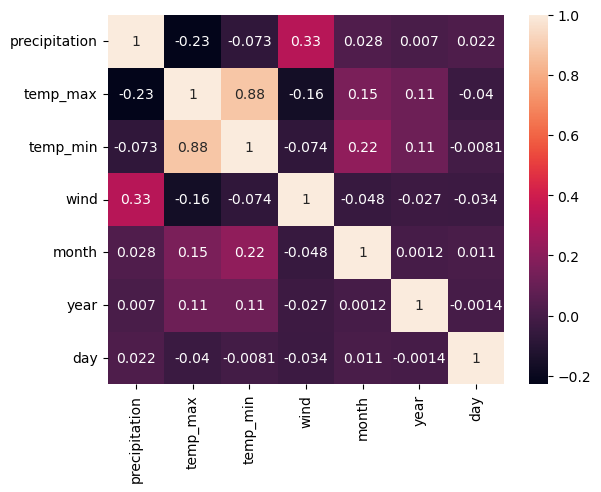

In [16]:
corr_d=data.corr()
sns.heatmap(corr_d, annot=True)
plt.show()

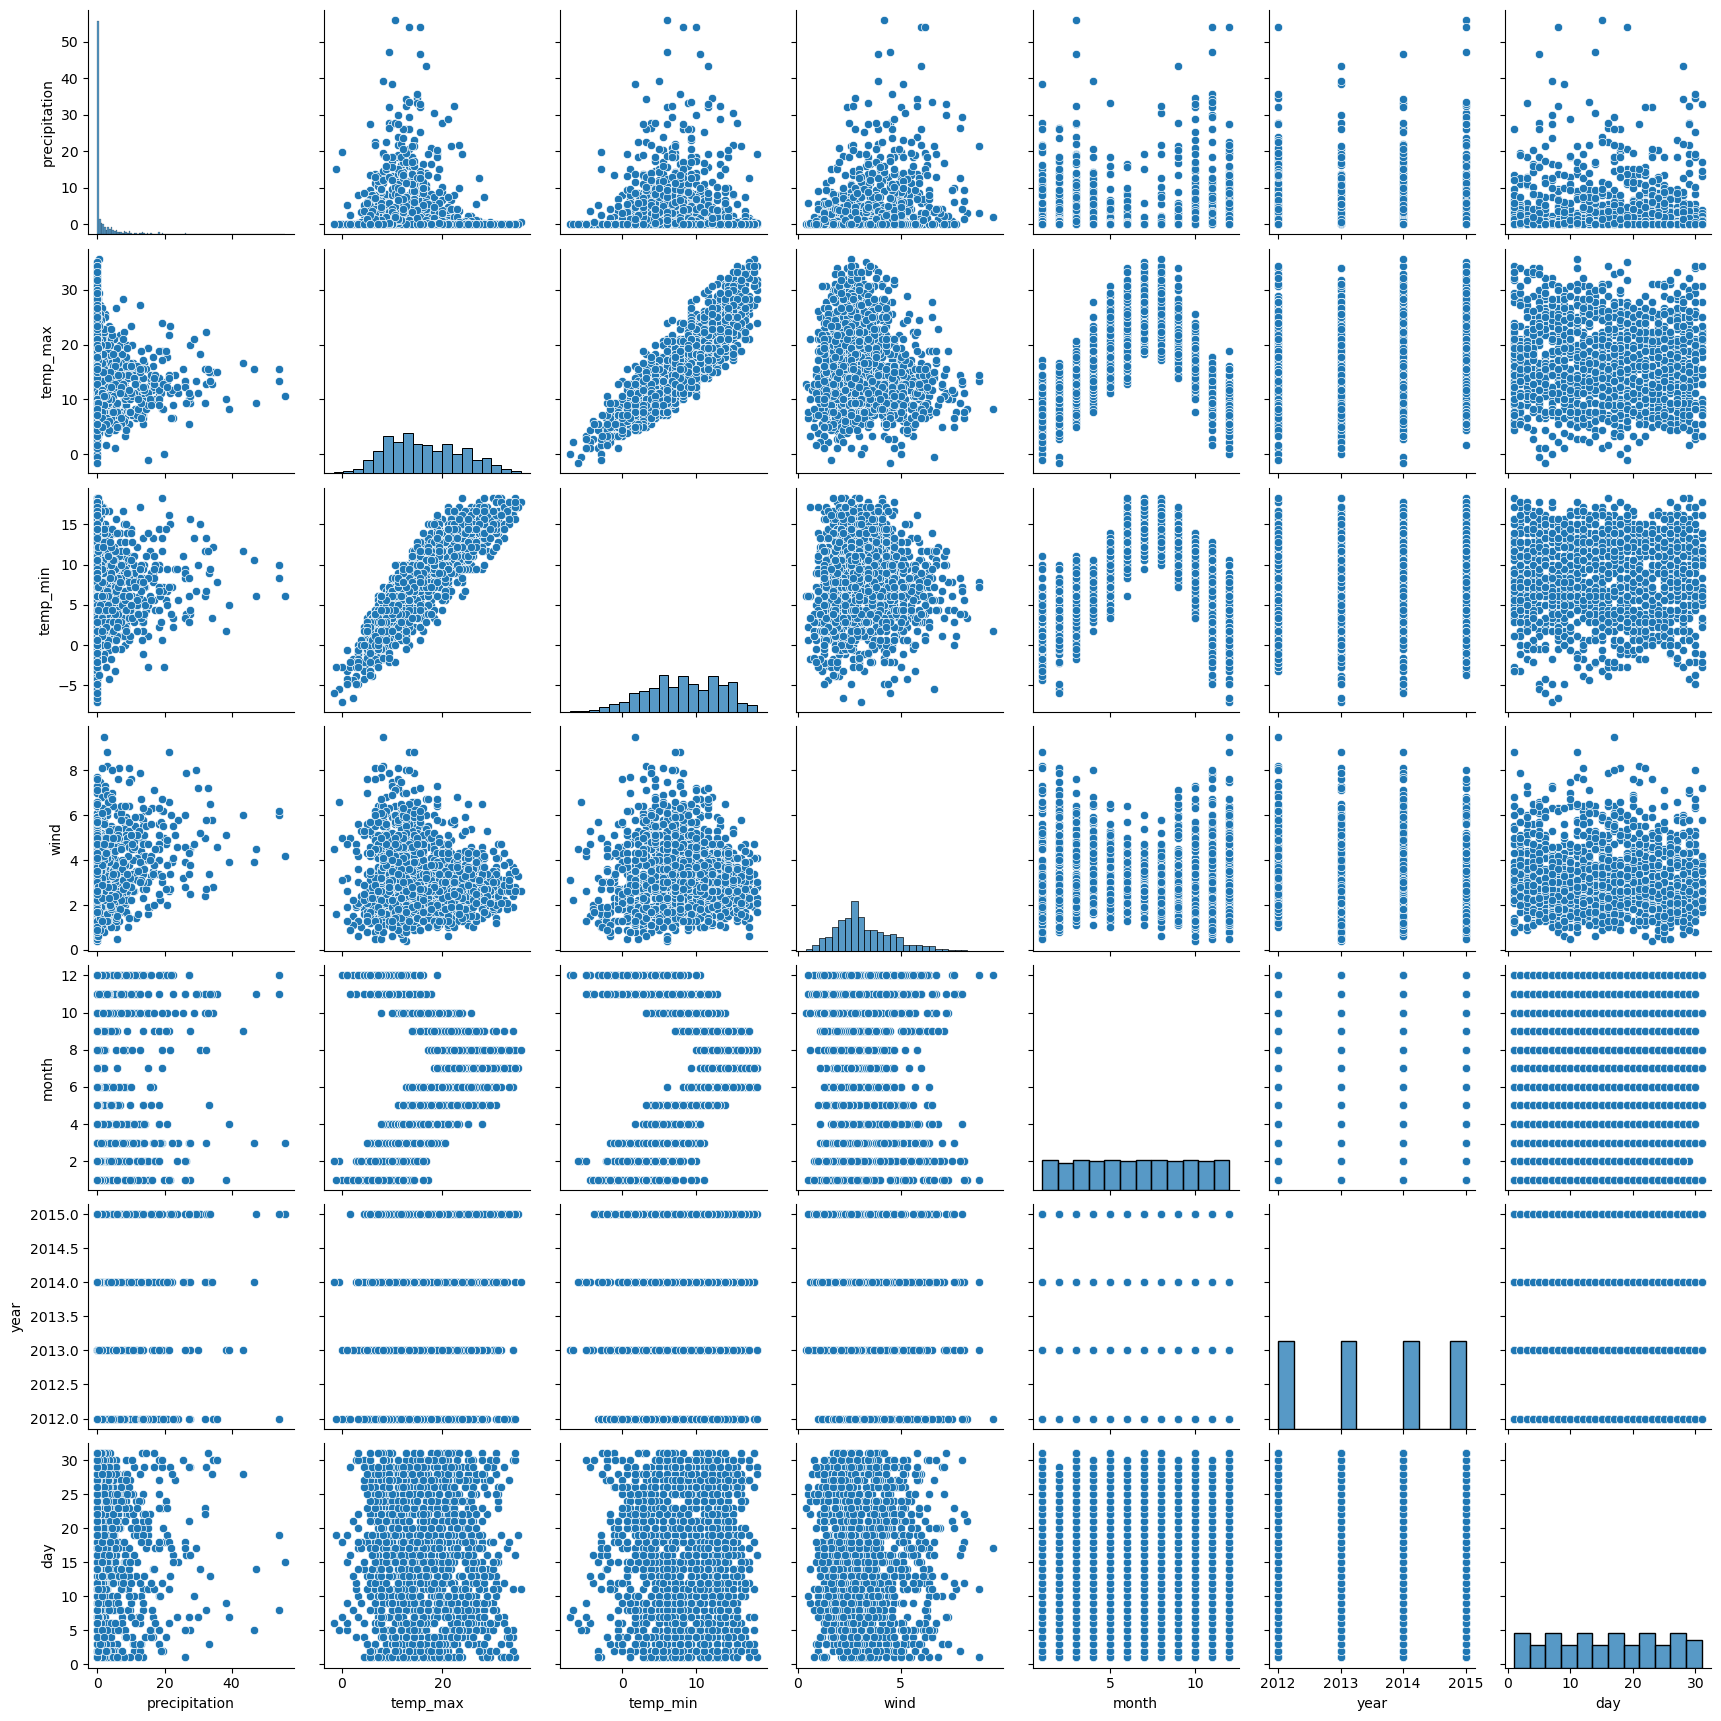

In [17]:
sns.pairplot(data)
plt.show()

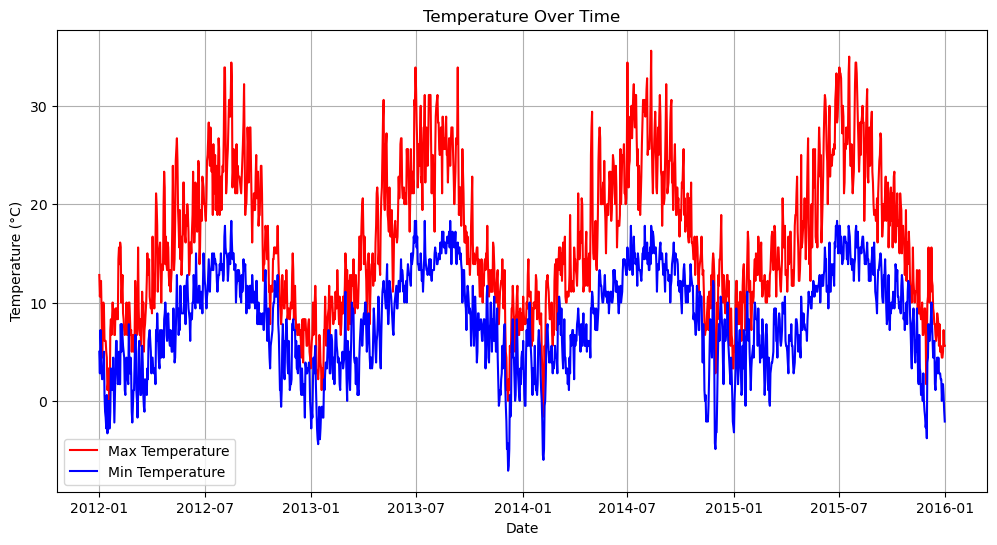

In [18]:
# Convert the 'date' column to a datetime object if it's not already
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%y')

# Plotting temperature data
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['temp_max'], label='Max Temperature', color='red')
plt.plot(data['date'], data['temp_min'], label='Min Temperature', color='blue')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

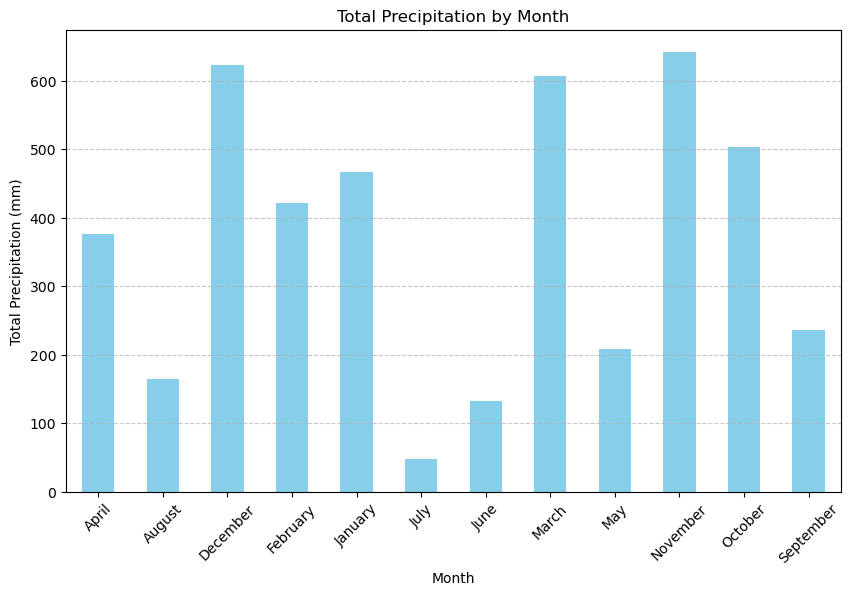

In [19]:
# Group the data by month and calculate the sum of precipitation for each month
monthly_precipitation = data.groupby(data['date'].dt.strftime('%B'))['precipitation'].sum()

# Plotting precipitation data
plt.figure(figsize=(10, 6))
monthly_precipitation.plot(kind='bar', color='skyblue')
plt.title('Total Precipitation by Month')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

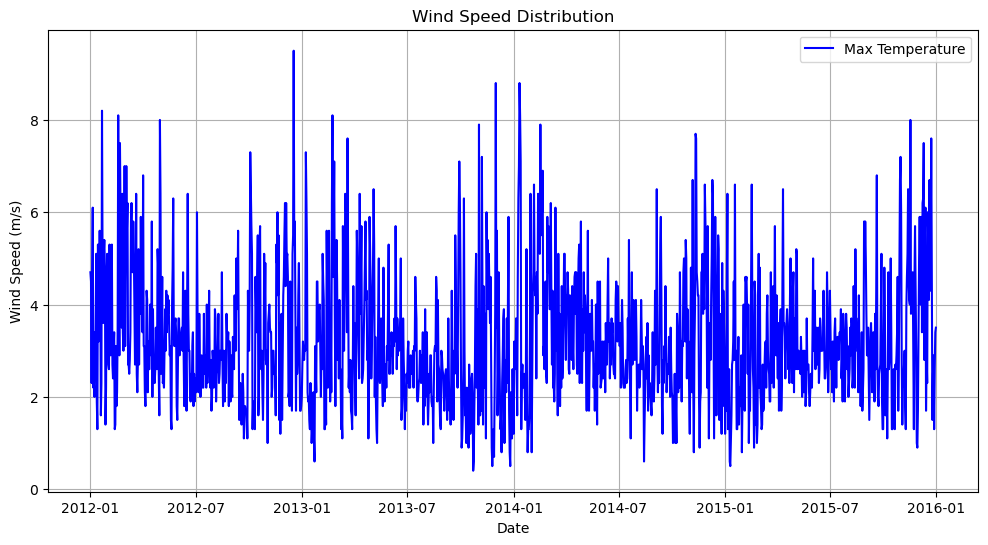

In [20]:
# Plotting wind data
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['wind'], label='Max Temperature', color='blue')
plt.title('Wind Speed Distribution')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid()
plt.show()

# Step 4: Data Cleaning and Outlier Removal

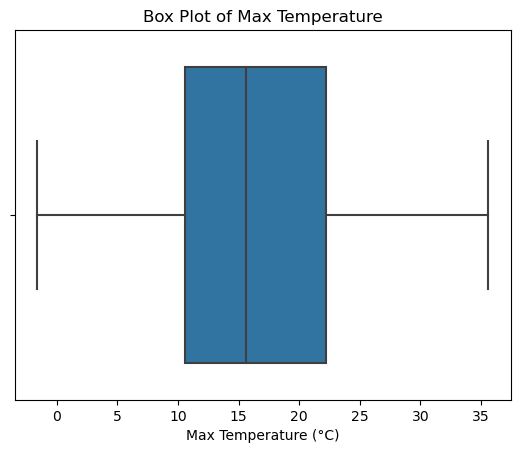

In [21]:
sns.boxplot(x=data["temp_max"])
plt.xlabel('Max Temperature (°C)')
plt.title('Box Plot of Max Temperature')
plt.show()

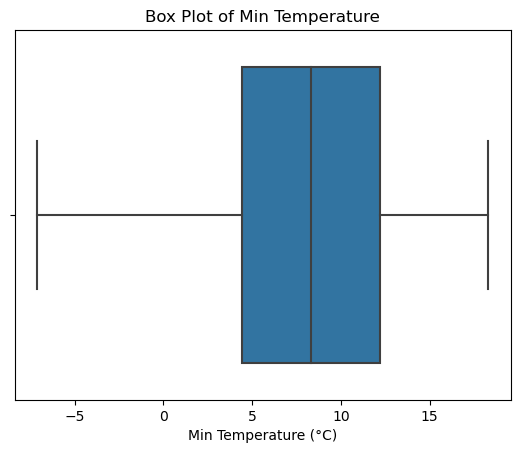

In [22]:
sns.boxplot(x=data["temp_min"])
plt.xlabel('Min Temperature (°C)')
plt.title('Box Plot of Min Temperature')
plt.show()

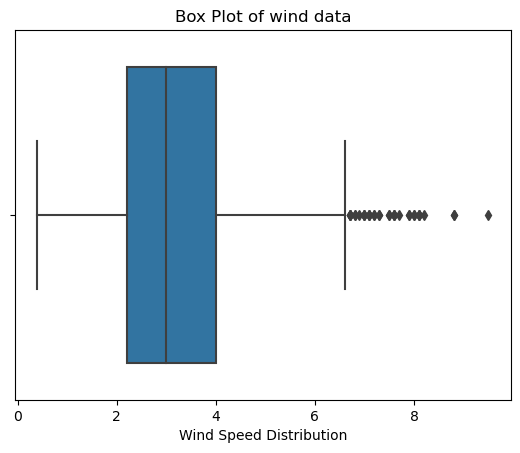

In [23]:
sns.boxplot(x=data["wind"])
plt.xlabel('Wind Speed Distribution')
plt.title('Box Plot of wind data')
plt.show()

In [24]:
# Calculate the 5th and 95th percentiles
q5 = data["wind"].quantile(0.05)
q95 = data["wind"].quantile(0.97)

# Filter out values outside the percentile range
data = data[(data["wind"] >= q5) & (data["wind"] <= q95)]


In [25]:
data.shape

(1363, 9)

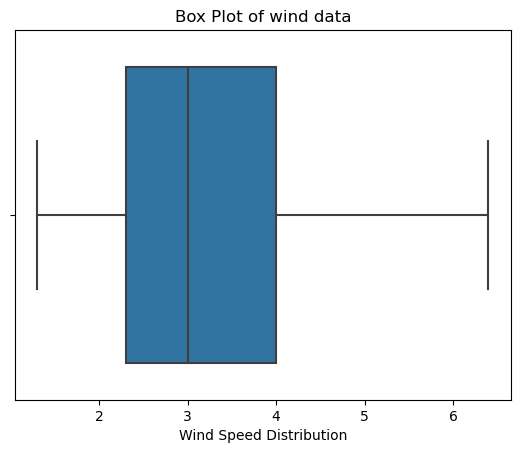

In [26]:
sns.boxplot(x=data["wind"])
plt.xlabel('Wind Speed Distribution')
plt.title('Box Plot of wind data')
plt.show()

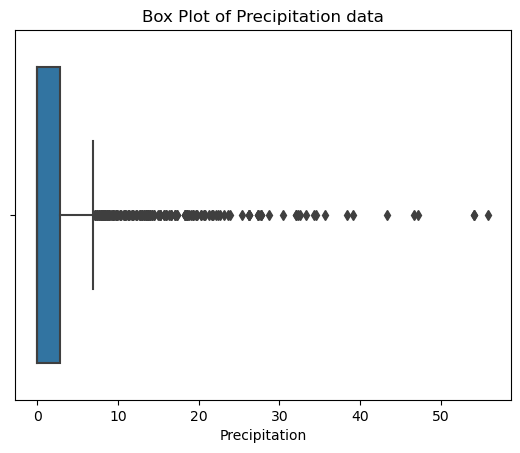

In [27]:
sns.boxplot(x=data["precipitation"])
plt.xlabel('Precipitation')
plt.title('Box Plot of Precipitation data')
plt.show()

In [28]:
q1 = data["precipitation"].quantile(0.01)
q95 = data["precipitation"].quantile(0.90)

# Filter out values outside the percentile range
data = data[(data["precipitation"] >= q1) & (data["precipitation"] <= q95)]

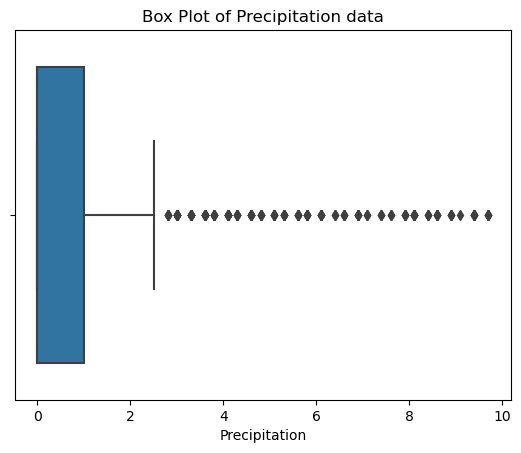

In [29]:
sns.boxplot(x=data["precipitation"])
plt.xlabel('Precipitation')
plt.title('Box Plot of Precipitation data')
plt.show()

In [30]:
from scipy import stats

z_scores_precipitation = stats.zscore(data['precipitation'])
threshold = 2  
# Remove outliers based on the threshold
data = data[(z_scores_precipitation >= -threshold) & (z_scores_precipitation <= threshold)]


In [31]:
data.shape

(1134, 9)

In [32]:
data

,date,precipitation,temp_max,temp_min,wind,weather,month,year,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,2012,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1,2012,3
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1,2012,5
5,2012-01-06,2.5,4.4,2.2,2.2,rain,1,2012,6
6,2012-01-07,0.0,7.2,2.8,2.3,rain,1,2012,7
...,...,...,...,...,...,...,...,...,...
1455,2015-12-26,0.0,4.4,0.0,2.5,sun,12,2015,26
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,12,2015,28
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,12,2015,29
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,12,2015,30


# Step 5: Feature Selection

In [33]:
numerical_columns = ['precipitation','temp_max', 'temp_min', 'wind']
X=data[numerical_columns]
y=data["weather"]

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss=StandardScaler()
X_data=ss.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_data,y, test_size=0.2, random_state=42)

In [35]:
X_train.shape

(907, 4)

In [36]:
X_test.shape

(227, 4)

# Step 6: Model Building & Model Evaluation

In [37]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(max_depth=10,random_state=42)

In [38]:
RF_model.fit(X_train,y_train)
y_pred=RF_model.predict(X_test)
y_pred

array(['sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'fog', 'sun', 'rain',
       'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun',
       'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain',
       'drizzle', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun',
       'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun',
       'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun',
       'rain', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'rain', 'fog', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun',
       'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun',
       'sun', 'rain', 'sun', 'drizzle', 'sun', 'sun', 'rain', 'sun',
       'rain', 'sun', 'sun', 'rain', 'rain', 'rain', 'rain', 'sun', 'sun',
       'sun', 'rain', 'sun', 'rain', 'fog', 'sun', 'sun', 'sun'

In [39]:
from sklearn.metrics import accuracy_score,classification_report
RF_accuracy=accuracy_score(y_pred,y_test)
RF_accuracy

0.8149779735682819

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.81


# Step 7: Checking Model are Overfitted or Underfitted

In [41]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(RF_model, X_data, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")
threshold = 0.03
# Check for overfitting or underfitting
if accuracy > cv_scores.mean() + threshold:
    print("The model may be overfitting the data.")
elif accuracy < cv_scores.mean() - threshold:
    print("The model may be underfitting the data.")
else:
    print("The model is performing consistently.")

Cross-Validation Scores: [0.74008811 0.78854626 0.8061674  0.86784141 0.86725664]
Mean CV Accuracy: 0.81
The model is performing consistently.


In [42]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     drizzle       0.17      0.08      0.11        13
         fog       0.00      0.00      0.00        14
        rain       0.97      0.90      0.93        77
        snow       0.00      0.00      0.00         2
         sun       0.78      0.95      0.86       121

    accuracy                           0.81       227
   macro avg       0.38      0.38      0.38       227
weighted avg       0.76      0.81      0.78       227



# Step 8: Model Comparison

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
classifiers={"LogisticRegression":LogisticRegression(),
           "SVC":SVC(),"DecisionTreeClassifier":DecisionTreeClassifier(),"KNeighborsClassifier":KNeighborsClassifier(),
           'Random Forest': RandomForestClassifier()}

result={}

for name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    
    accuracy=accuracy_score(y_pred,y_test)
    report=classification_report(y_pred,y_test)
    
    result[name]={"Accuracy":accuracy,
                 "Classification Report": report}
    
# Compare model performance
for name, metrics in result.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print("Classification Report:\n", metrics['Classification Report'])
    print("\n")

Model: LogisticRegression
Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         0
         fog       0.00      0.00      0.00         0
        rain       0.83      0.98      0.90        65
        snow       0.50      1.00      0.67         1
         sun       1.00      0.75      0.86       161

    accuracy                           0.82       227
   macro avg       0.47      0.55      0.49       227
weighted avg       0.95      0.82      0.87       227



Model: SVC
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         0
         fog       0.00      0.00      0.00         0
        rain       0.82      0.98      0.89        64
        snow       0.50      1.00      0.67         1
         sun       1.00      0.75      0.86       162

    accuracy                           0.81       227
   macro avg  

In [44]:
from joblib import dump, load

# Train and save your RandomForestClassifier model
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)
dump(RF_model, 'RF_model.joblib')

# Load the trained model whenever you need to make predictions
loaded_RF_model = load('RF_model.joblib')

# Make predictions using the loaded model
y_pred = loaded_RF_model.predict(X_test)
y_pred
# Now you can use the loaded_RF_model to make predictions on new data


array(['sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'fog', 'sun', 'rain',
       'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun',
       'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain',
       'drizzle', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun',
       'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun',
       'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun',
       'rain', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'rain', 'fog', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun',
       'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun',
       'sun', 'rain', 'sun', 'drizzle', 'sun', 'sun', 'rain', 'sun',
       'rain', 'sun', 'fog', 'rain', 'rain', 'rain', 'rain', 'sun', 'sun',
       'sun', 'rain', 'sun', 'rain', 'fog', 'sun', 'sun', 'sun'

In [45]:
X_test

array([[-0.49271572,  0.40452312,  0.59474582,  0.14249819],
       [-0.49271572, -0.25822714,  0.14841693,  2.39184323],
       [-0.25380197,  0.76240825,  0.90523549,  0.32244579],
       [-0.49271572,  1.35888348,  1.23513076, -1.11713503],
       [-0.09452614,  2.39277387,  1.77848767, -0.39734462],
       [ 2.53352515,  0.03338298,  0.69177384, -0.30737082],
       [-0.49271572, -0.70889731, -0.16207273, -1.11713503],
       [-0.49271572, -0.62936728, -0.491968  ,  1.13221001],
       [-0.25380197,  0.69613323,  0.90523549,  0.682341  ],
       [-0.49271572,  0.69613323,  0.59474582,  0.7723148 ],
       [ 0.54257721,  0.47079814,  1.02166911, -1.02716123],
       [-0.49271572, -0.56309225, -0.70542964, -0.66726602],
       [-0.49271572, -0.85470236, -1.34581457, -0.03744941],
       [-0.49271572,  1.42515851,  0.90523549, -0.84721363],
       [-0.49271572,  0.55032817,  1.02166911,  0.5023934 ],
       [ 2.13533556, -0.77517233, -1.13235293,  0.23247199],
       [-0.49271572,  0.

# Step 9: Model Saving

In [46]:
import joblib
joblib.dump(RF_model,"RF_model.pkl")

['RF_model.pkl']

# Step 10: User Input and Prediction

In [47]:
from joblib import load
import numpy as np

# Load the pre-trained Random Forest model
loaded_RF_model = load('RF_model.pkl')

# Collect user input (replace with your own input method)
precipitation = float(input("Enter precipitation (mm): "))
Max_temperature = float(input("Enter max temperature (°C): "))
Min_temperature = float(input("Enter min temperature (°C): "))
wind_speed = float(input("Enter wind speed (m/s): "))
day = int(input("Enter day (1-31)(DD): "))
month = int(input("Enter month (1-12)(MM): "))
year=int(input("Enter Year (YYYY): "))

# Create a numpy array with user input data
user_input = np.array([[precipitation,Max_temperature, Min_temperature, wind_speed]])
other_input=np.array([month,day])

# Make a prediction using the loaded model
predicted_weather = loaded_RF_model.predict(user_input)

# Display the predicted weather to the user
print(f"Predicted Weather: {predicted_weather[0]}")

Enter precipitation (mm): 0.5
Enter max temperature (°C): 31
Enter min temperature (°C): -2.3
Enter wind speed (m/s): 0.5
Enter day (1-31)(DD): 23
Enter month (1-12)(MM): 2
Enter Year (YYYY): 2021
Predicted Weather: rain
